<a href="https://colab.research.google.com/github/Rohan1-tech/Financial-Forecasting-Frontier/blob/main/Financial_Forecasting_Frontier_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Financial Forecasting Frontier



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.



This project focuses on applying distributed machine learning techniques to solve a real-world banking problem using Apache Spark ML. The dataset used, bank.csv, contains customer demographic information, financial details, and marketing campaign data collected by a banking institution. The primary objective is to predict whether a client will subscribe to a term deposit, which is a classic binary classification problem in the banking domain.

In modern banking systems, data is generated at a massive scale and must be processed efficiently to support data-driven decision-making. Traditional single-machine processing is often insufficient for handling such large and complex datasets. This project demonstrates how Spark’s distributed computing capabilities can be leveraged to efficiently process, analyze, and model large-scale banking data.

The project begins with loading the dataset into a Spark DataFrame and performing exploratory data analysis (EDA) to understand the structure, data types, and distribution of variables. Data preprocessing steps such as handling missing values, managing outliers, and encoding categorical variables are applied to prepare the data for machine learning.

Feature engineering is performed using VectorAssembler to combine multiple input features into a single feature vector compatible with Spark ML models. A classification model (such as Logistic Regression or Decision Tree Classifier) is then trained to predict customer subscription behavior. The model’s performance is evaluated using appropriate classification metrics to assess its effectiveness.

To further improve model performance, hyperparameter tuning is carried out using CrossValidator and ParamGridBuilder, ensuring optimal model selection. Finally, model interpretability is addressed by analyzing feature coefficients or feature importance to understand which factors most influence a customer’s decision to subscribe to a term deposit.

Overall, this project simulates a real-world banking analytics pipeline and highlights how distributed machine learning with Spark ML can help financial institutions gain actionable insights, improve marketing strategies, and support smarter business decisions

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

Banks run marketing campaigns to encourage customers to subscribe to term deposits. However, contacting every customer is costly and inefficient. The challenge is to **identify customers who are most likely to subscribe**, so that marketing efforts can be focused and effective.


In the banking industry, term deposits are a key source of stable revenue. Banks conduct large-scale marketing campaigns to encourage customers to subscribe to these deposits. However, reaching out to every customer is inefficient, costly, and often results in low conversion rates.

The challenge lies in identifying which customers are most likely to subscribe to a term deposit based on their demographic information, financial status, and past marketing interactions.

The bank.csv dataset contains detailed customer information such as age, job, balance, loan status, contact history, and previous campaign outcomes. Due to the large volume and mixed nature of this data (numerical and categorical), traditional data processing and modeling approaches may not scale efficiently or provide timely insights.


Therefore, the problem is to design a scalable, distributed machine learning solution using Apache Spark ML that can:

* Efficiently process large banking datasets

* Accurately predict whether a customer will subscribe to a term deposit (y)

* Identify the most influential factors affecting customer subscription decisions

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [3]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Dataset First View

In [4]:
# Dataset First Look

df = pd.read_csv('/content/drive/MyDrive/Data/bank.csv')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count

df.shape

(4521, 17)

### Dataset Information

In [6]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count

df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count

df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


<Axes: >

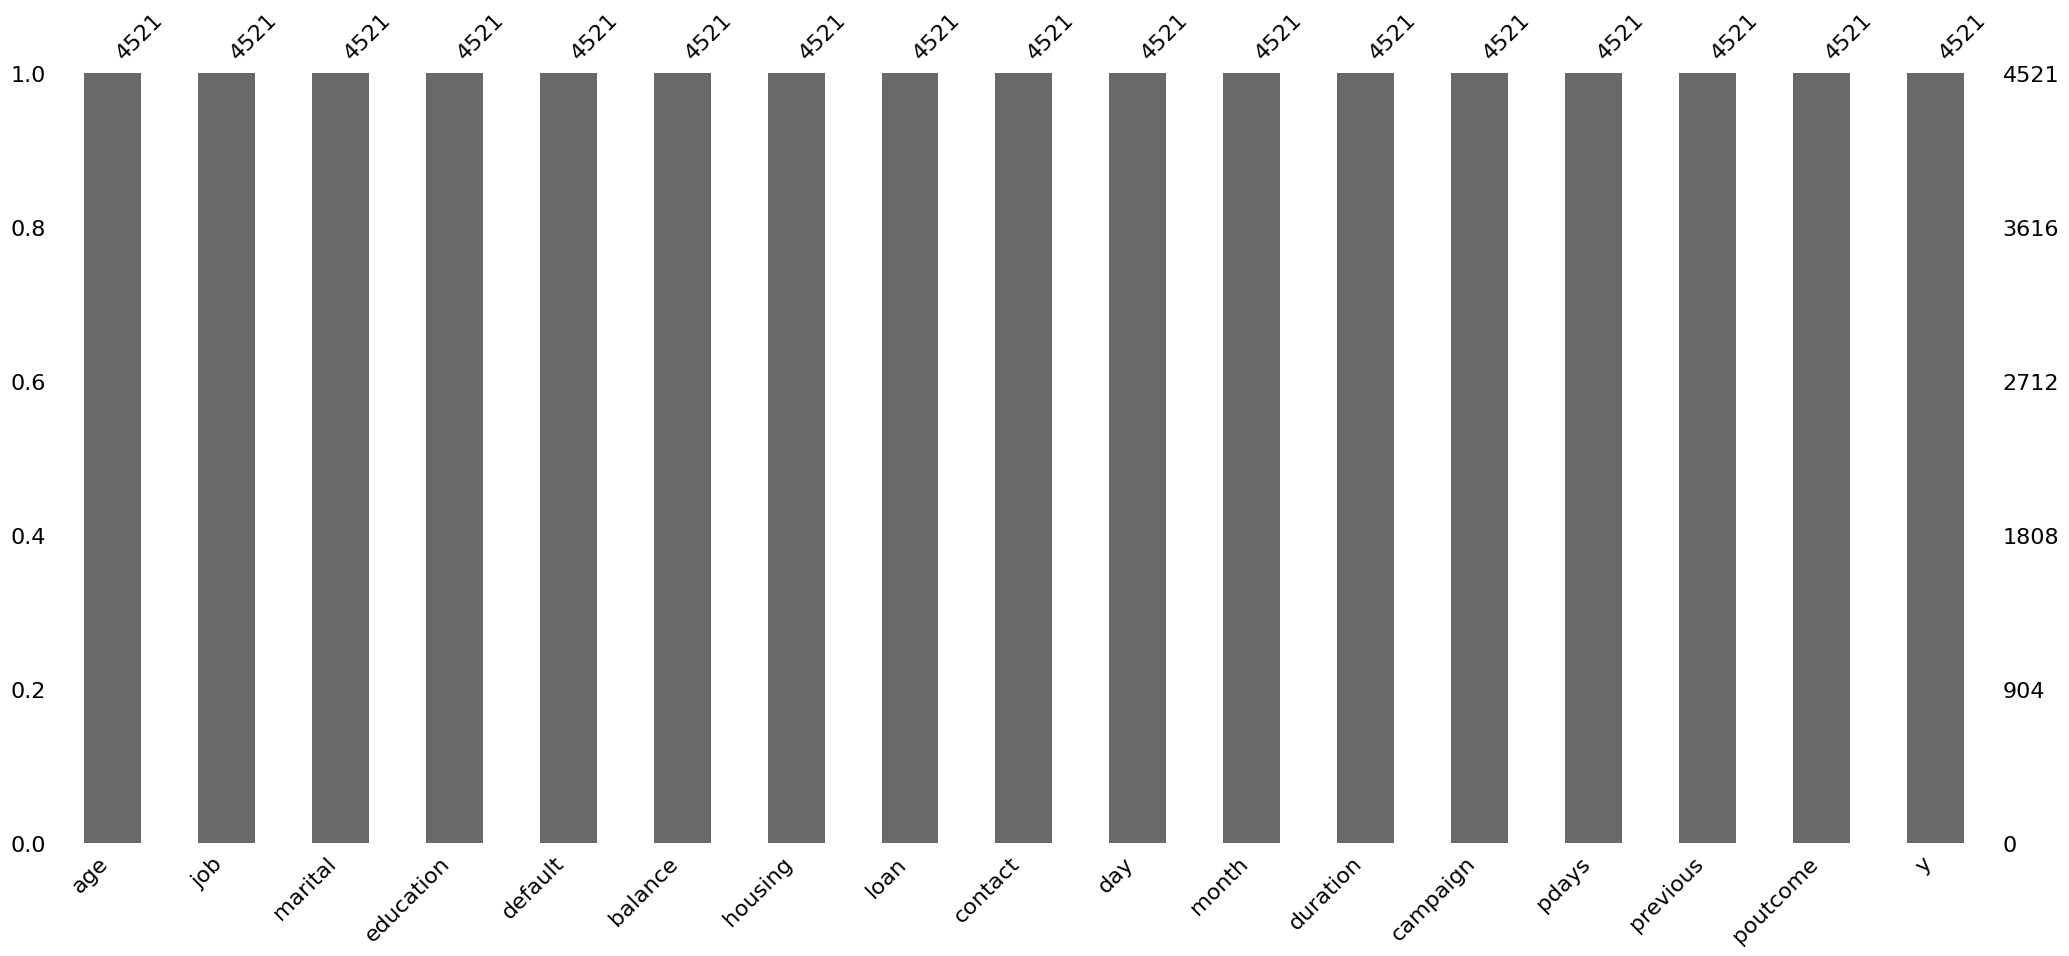

In [9]:
# Visualizing the missing values

import missingno as msno

msno.bar(df)

### What did you know about your dataset?

Answer Here



**1. Dataset Size and Structure**

The dataset contains **4,521 rows and 17 columns**, where each row represents a single customer record related to a banking marketing campaign.

Out of the 17 columns:

* **7 columns are numerical** (`int64`)
* **10 columns are categorical** (`object`)

This structure confirms that the dataset includes both customer demographic information and campaign-related attributes, making it suitable for supervised machine learning.






 **2. Data Types Overview**

**Numerical Columns (7):**
`age`, `balance`, `day`, `duration`, `campaign`, `pdays`, `previous`

**Categorical Columns (10):**
`job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `poutcome`, `y`

The target variable **`y`** is categorical and represents whether a customer subscribed to a term deposit (`yes` or `no`).
This confirms that the problem is a **binary classification task**.



 **3. Missing Values Analysis**

All columns in the dataset contain **4,521 non-null values**, indicating that:

* **There are no missing or null values** in the dataset.
* No imputation is required for missing data at this stage.

This improves data quality and reduces preprocessing complexity.


 **4. Duplicate Records Check**

A duplicate check was performed on the dataset:

* **Number of duplicate rows: 0**

This indicates that the dataset contains **no duplicate records**, ensuring data integrity and reliability for model training.


 **5. Memory Usage**

The dataset occupies approximately **600.6 KB of memory**, which is relatively small.
Although the dataset size is manageable on a single machine, this project focuses on demonstrating **distributed machine learning concepts using Apache Spark**, simulating real-world banking systems that handle much larger datasets.



**6. Initial Observations**

* The dataset is **clean, complete, and well-structured**.
* No missing values or duplicate records are present.
* Categorical features will require **encoding** before applying machine learning models.
* Numerical features may contain **outliers**, which will need further analysis in the preprocessing stage.
* Campaign-related variables such as `duration`, `campaign`, and `poutcome` are expected to play a significant role in predicting customer subscription behavior.



## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns

list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [11]:
# Dataset Describe

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### Variables Description

Answer Here



| Feature                 | What it Represents                 | Why it Matters                        | Expected Impact                |
| ----------------------- | ---------------------------------- | ------------------------------------- | ------------------------------ |
| `duration`              | Length of customer interaction     | Longer calls often indicate interest  | Strong positive influence      |
| `campaign`              | Number of contacts during campaign | Too many calls may reduce success     | Helps identify optimal contact |
| `poutcome_success`      | Previous campaign success          | Past success predicts future behavior | High predictive power          |
| `balance`               | Customer financial strength        | Wealthier customers invest more       | Moderate positive impact       |
| `housing_yes`           | Housing loan status                | Indicates financial commitments       | Influences decision-making     |
| Encoded job & education | Customer profile                   | Different segments behave differently | Improves segmentation          |



### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.

df.nunique()


,0
age,67
job,12
marital,3
education,4
default,2
balance,2353
housing,2
loan,2
contact,3
day,31


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
# Separate Numerical and Categorical Columns

num_cols = df.select_dtypes(include=['int64']).columns.tolist()

# Categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

num_cols, cat_cols




(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'],
 ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome',
  'y'])

In [14]:
# Unique values in categorical columns
for col in cat_cols:
    print(f"\n{col}")
    print(df[col].unique())



job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']

marital
['married' 'single' 'divorced']

education
['primary' 'secondary' 'tertiary' 'unknown']

default
['no' 'yes']

housing
['no' 'yes']

loan
['no' 'yes']

contact
['cellular' 'unknown' 'telephone']

month
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']

poutcome
['unknown' 'failure' 'other' 'success']

y
['no' 'yes']


In [15]:
# Convert target variable to binary (optional for modeling)
df['y'] = df['y'].map({'yes': 1, 'no': 0})


### What all manipulations have you done and insights you found?

Answer Here.

Data wrangling was performed to prepare the dataset for analysis. Since the dataset contained no missing or duplicate values, the primary focus was on separating numerical and categorical features, analyzing unique categorical values, and converting the target variable into a binary numerical format suitable for machine learning.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

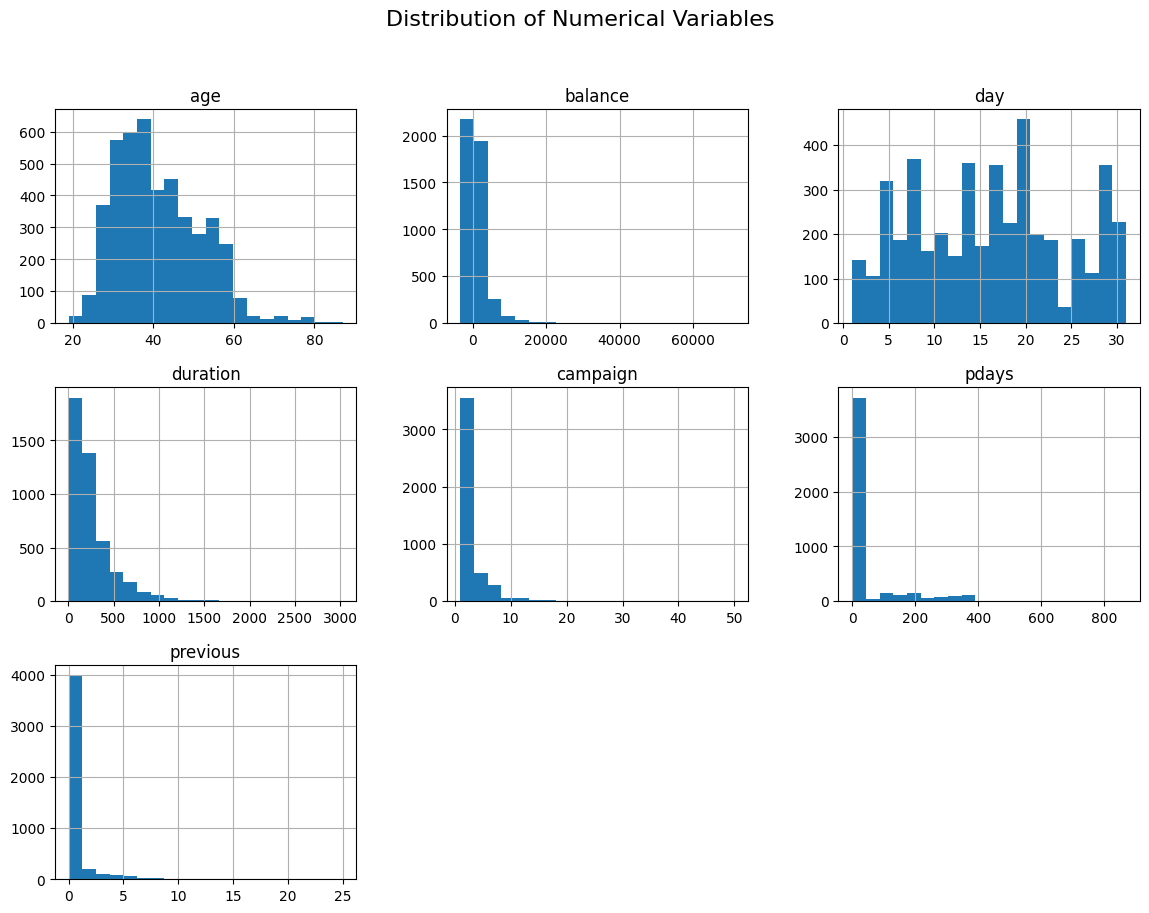

In [16]:
# Chart - Distribution of Numerical Variables

df[num_cols].hist(figsize=(14, 10), bins=20)
plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

This chart was selected to quickly understand the distribution, spread, and skewness of numerical variables and to identify potential outliers.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Some variables such as balance and duration are right-skewed, indicating the presence of high-value customers and long call durations, while age appears more evenly distributed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, these insights help improve customer targeting and model accuracy. If outliers are ignored, predictions may become biased, leading to inefficient marketing efforts.

#### Chart - 2

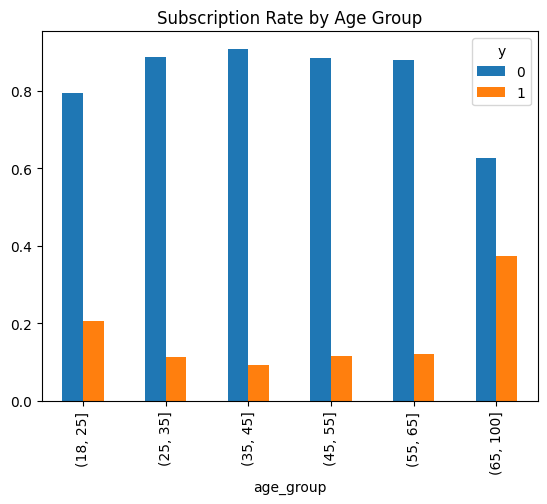

In [17]:
# Chart - 2 Subscription Rate by Age Group

df['age_group'] = pd.cut(df['age'], bins=[18,25,35,45,55,65,100])
pd.crosstab(df['age_group'], df['y'], normalize='index').plot(kind='bar')
plt.title("Subscription Rate by Age Group")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

To analyze subscription probability across age segments.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Middle-aged groups show higher subscription rates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Helps target the most responsive age segments.

#### Chart - 3

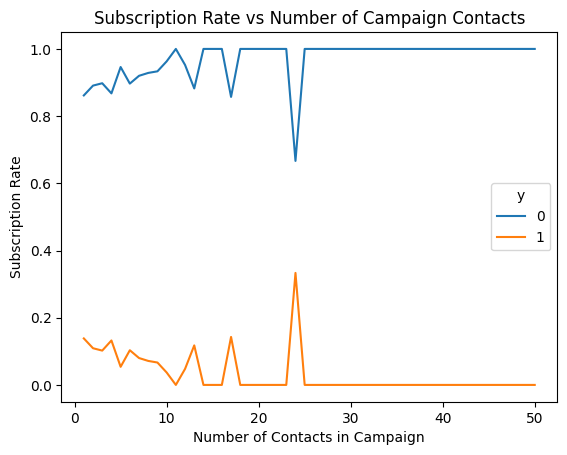

In [18]:
# Chart - 3 Subscription Rate vs Number of Campaign Contacts

pd.crosstab(df['campaign'], df['y'], normalize='index').plot()
plt.title("Subscription Rate vs Number of Campaign Contacts")
plt.xlabel("Number of Contacts in Campaign")
plt.ylabel("Subscription Rate")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.


This chart was selected to understand how the number of times a customer is contacted during a marketing campaign affects their likelihood of subscribing to a term deposit. It helps evaluate whether repeated follow-ups improve conversions or lead to customer fatigue

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart shows that subscription rates are higher when customers are contacted fewer times and tend to decline as the number of contacts increases. This indicates diminishing returns from repeated outreach, suggesting that excessive follow-ups may reduce customer interest rather than increase it.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here   

Yes, these insights help banks optimize campaign strategies by identifying an effective contact limit. Limiting unnecessary follow-ups can reduce operational costs and improve customer experience.
If ignored, excessive contacting may lead to customer dissatisfaction and lower conversion rates, negatively impacting campaign performance.

#### Chart - 4

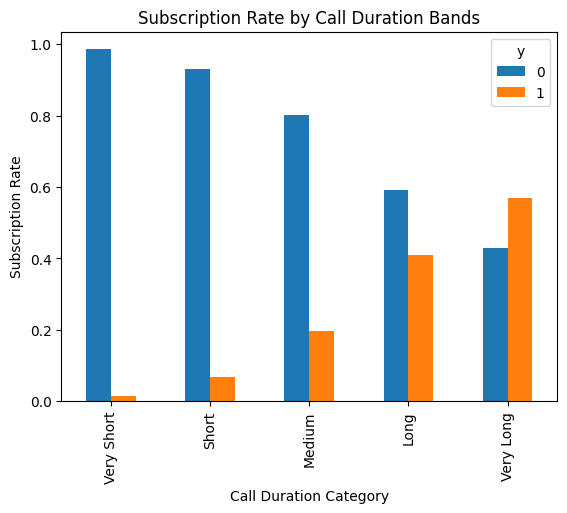

In [19]:
# Chart - 4 Subscription Rate by Call Duration Bands

# Create duration bands
df['duration_band'] = pd.cut(
    df['duration'],
    bins=[0, 100, 300, 600, 1000, df['duration'].max()],
    labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
)

pd.crosstab(df['duration_band'], df['y'], normalize='index').plot(kind='bar')
plt.title("Subscription Rate by Call Duration Bands")
plt.xlabel("Call Duration Category")
plt.ylabel("Subscription Rate")
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

This chart was selected to understand how customer engagement level, measured through call duration, influences the likelihood of subscribing to a term deposit. Grouping duration into bands makes the relationship clearer and more interpretable.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Customers with longer call durations show a significantly higher subscription rate compared to those with very short calls. Very short calls rarely lead to successful subscriptions, indicating low customer interest or ineffective engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, the insights help banks focus on improving call quality rather than call quantity, leading to higher conversion rates.
If calls are rushed or cut short, it may result in poor customer engagement and lower subscription success, negatively affecting campaign outcomes.

#### Chart - 5

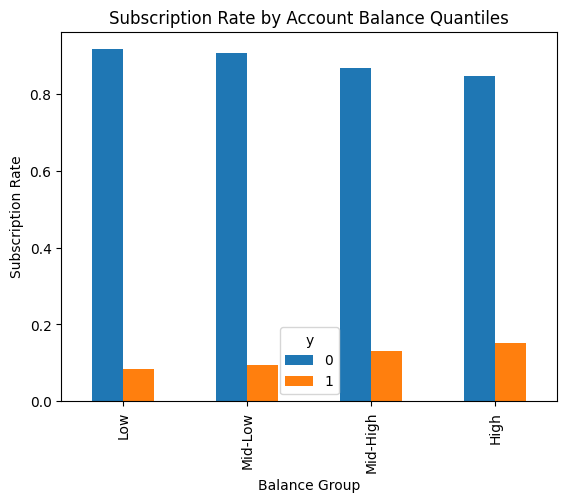

In [88]:
# Chart - 5Subscription Rate by Account Balance Quantiles

# Create balance quantiles
df['balance_quantile'] = pd.qcut(df['balance'], 4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

# Plot subscription rate by balance quantile
pd.crosstab(df['balance_quantile'], df['y'], normalize='index').plot(kind='bar')
plt.title("Subscription Rate by Account Balance Quantiles")
plt.xlabel("Balance Group")
plt.ylabel("Subscription Rate")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

This chart was chosen to analyze how customer financial strength, grouped into balance segments, affects subscription behavior.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Customers in higher balance quantiles show a noticeably higher subscription rate, while low-balance customers are less likely to subscribe.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here


Yes, it helps banks prioritize financially stable customers for term deposit campaigns. Targeting low-balance customers aggressively may lead to low conversions and wasted marketing effort.

#### Chart - 6

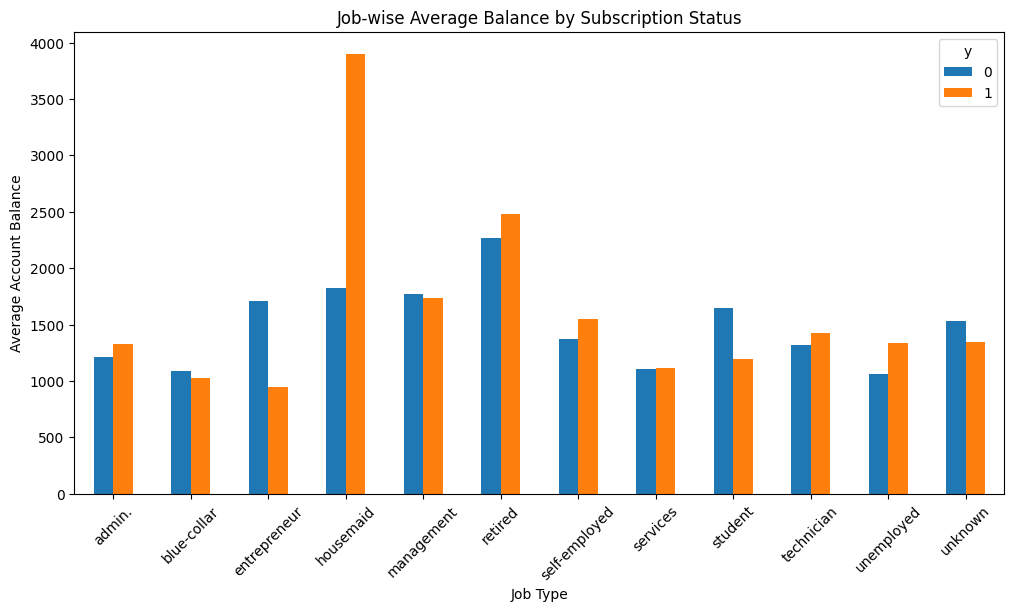

In [20]:
# Chart - 6 Job-wise Average Account Balance by Subscription Status

# Job-wise average balance by subscription status
job_balance = df.groupby(['job', 'y'])['balance'].mean().unstack()

job_balance.plot(kind='bar', figsize=(12,6))
plt.title("Job-wise Average Balance by Subscription Status")
plt.xlabel("Job Type")
plt.ylabel("Average Account Balance")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.


This chart was chosen to analyze how profession and financial strength together influence term deposit subscription behavior.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Across most job categories, customers who subscribed (y=1) tend to have a higher average balance than non-subscribers. Certain professions show a clearer gap, indicating stronger financial readiness to invest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here


Yes, banks can design job-specific campaigns targeting professions with higher balances and better conversion potential. Ignoring job–balance interaction may lead to inefficient targeting and lower campaign ROI.

#### Chart - 7

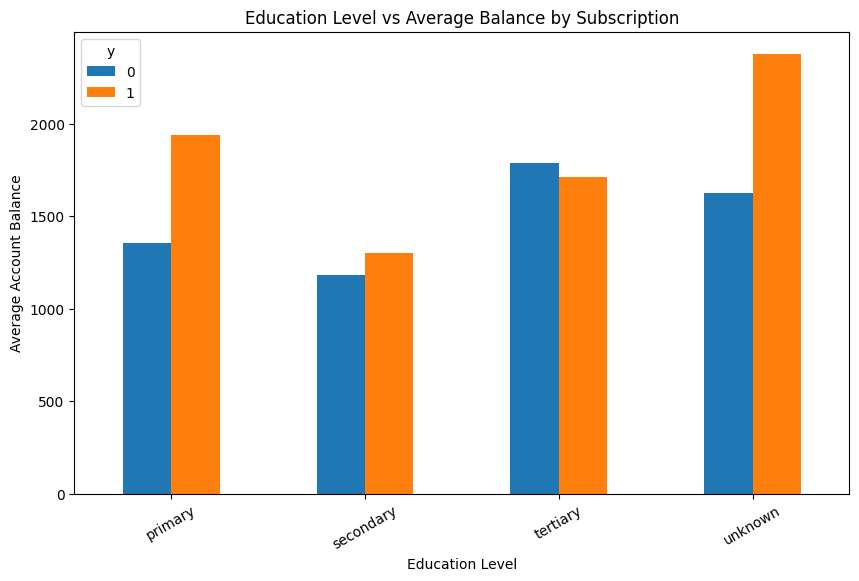

In [21]:
# Chart - 7 Education Level vs Average Account Balance (by Subscription)

# Education vs average balance by subscription
edu_balance = df.groupby(['education', 'y'])['balance'].mean().unstack()

edu_balance.plot(kind='bar', figsize=(10,6))
plt.title("Education Level vs Average Balance by Subscription")
plt.xlabel("Education Level")
plt.ylabel("Average Account Balance")
plt.xticks(rotation=30)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

This chart helps analyze how education level and financial capacity together influence term deposit subscription behavior.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Subscribers across most education levels tend to have higher average balances. Higher education levels often show stronger financial stability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Banks can tailor messaging based on education level. Ignoring education-related financial differences may reduce campaign effectiveness.

#### Chart - 8

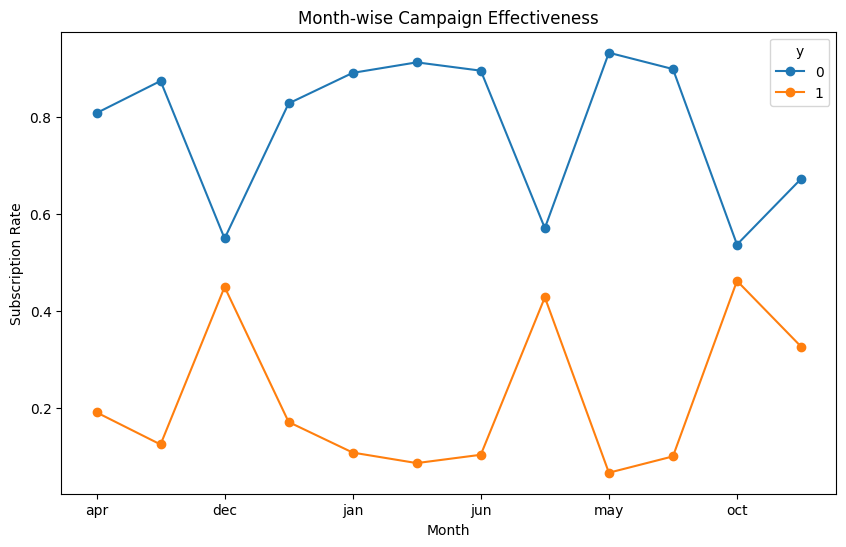

In [22]:
# Chart - 8 Month-wise Campaign Effectiveness (Subscription Rate)


# Month-wise subscription rate
month_effect = pd.crosstab(df['month'], df['y'], normalize='index')

month_effect.plot(kind='line', marker='o', figsize=(10,6))
plt.title("Month-wise Campaign Effectiveness")
plt.xlabel("Month")
plt.ylabel("Subscription Rate")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

This chart was chosen to detect seasonal patterns in campaign success.

##### 2. What is/are the insight(s) found from the chart?

Answer Here


Certain months show higher subscription rates, indicating better customer responsiveness during specific periods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here


Campaigns can be scheduled during high-response months for better ROI. Running campaigns uniformly across low-response months may increase costs with minimal returns.

#### Chart - 9

/tmp/ipython-input-1929311263.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='y', y='balance', data=df, palette='Set2')


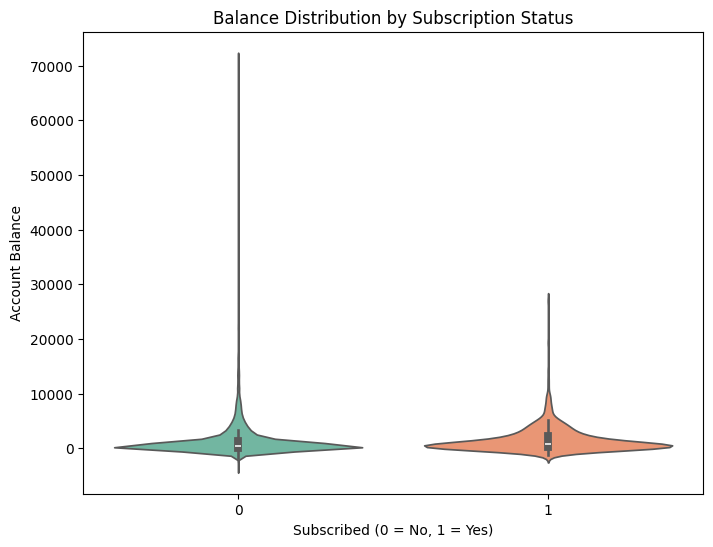

In [23]:
# Chart - 9 Violin Plot – Balance Distribution by Subscription


plt.figure(figsize=(8,6))
sns.violinplot(x='y', y='balance', data=df, palette='Set2')
plt.title("Balance Distribution by Subscription Status")
plt.xlabel("Subscribed (0 = No, 1 = Yes)")
plt.ylabel("Account Balance")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

Violin plots show distribution + density, which boxplots cannot fully capture.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Subscribers have a wider and higher balance distribution compared to non-subscribers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here


Supports wealth-based targeting. Overlooking distribution differences may reduce campaign ROI.

#### Chart - 10

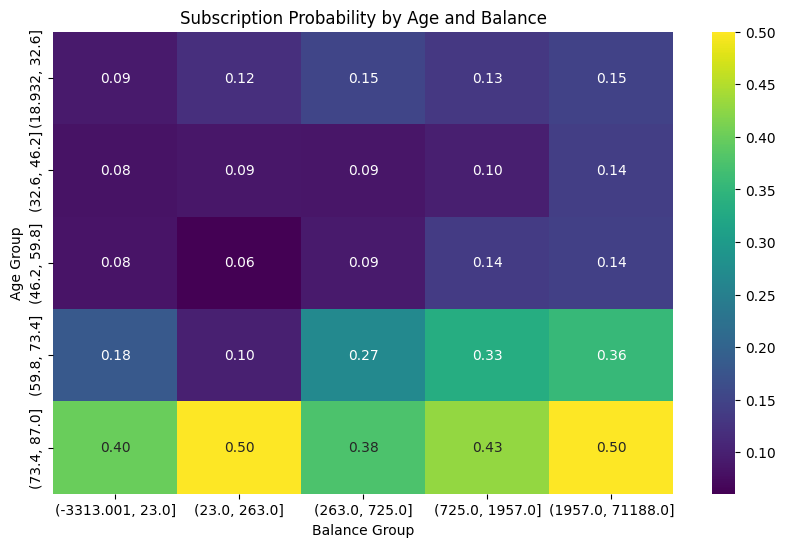

In [24]:
# Chart - 10 Subscription Probability by Age & Balance (Binned Heatmap)

# Create bins
df['age_bin'] = pd.cut(df['age'], bins=5)
df['balance_bin'] = pd.qcut(df['balance'], q=5)

# Heatmap of subscription rate
age_balance = pd.crosstab(
    df['age_bin'],
    df['balance_bin'],
    values=df['y'],
    aggfunc='mean'
)

plt.figure(figsize=(10,6))
sns.heatmap(age_balance, cmap='viridis', annot=True, fmt=".2f")
plt.title("Subscription Probability by Age and Balance")
plt.xlabel("Balance Group")
plt.ylabel("Age Group")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

To analyze combined impact of age and financial strength on subscription probability.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Customers in middle-to-older age groups with higher balances show the highest subscription probability

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Supports precise customer segmentation. Ignoring joint effects may lead to generic and inefficient targeting.

#### Chart - 11

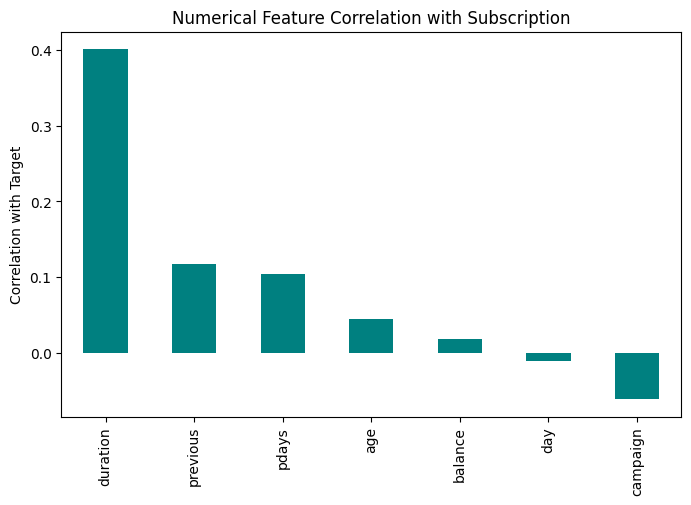

In [25]:
# Chart - 11 Feature Importance (Correlation with Target)

# Correlation with target variable
corr_target = df[num_cols + ['y']].corr()['y'].sort_values(ascending=False)

plt.figure(figsize=(8,5))
corr_target.drop('y').plot(kind='bar', color='teal')
plt.title("Numerical Feature Correlation with Subscription")
plt.ylabel("Correlation with Target")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

To identify which numerical features influence the target variable the most.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

duration shows the strongest positive correlation, while other features have weaker but meaningful influence.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here


Helps prioritize high-impact features for modeling. Using weak features unnecessarily may add noise and reduce model performance.

#### Chart - 12

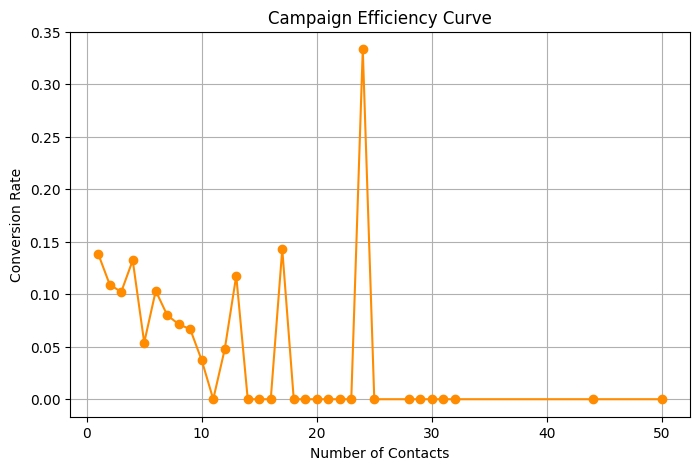

In [26]:
# Chart - 12 Campaign Efficiency Curve (Conversion per Contact)

# Conversion rate per campaign contact
campaign_eff = pd.crosstab(df['campaign'], df['y'], normalize='index')[1]

plt.figure(figsize=(8,5))
plt.plot(campaign_eff.index, campaign_eff.values, marker='o', color='darkorange')
plt.title("Campaign Efficiency Curve")
plt.xlabel("Number of Contacts")
plt.ylabel("Conversion Rate")
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

To evaluate marketing efficiency rather than just volume.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Conversion rate peaks early and declines sharply after multiple contacts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Helps reduce marketing cost and customer fatigue. Over-contacting customers can damage brand perception and reduce conversions.

#### Chart - 14 - Correlation Heatmap

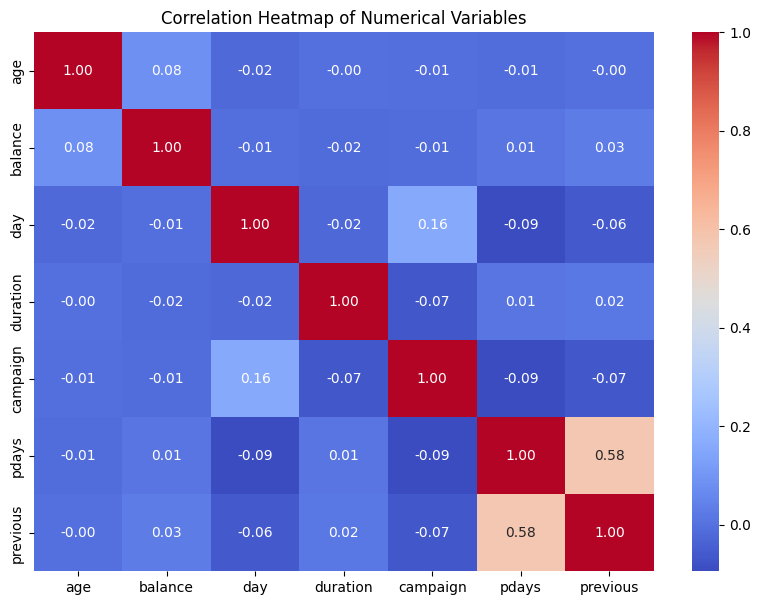

In [27]:
# Correlation Heatmap visualization code

plt.figure(figsize=(10,7))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

A heatmap helps understand relationships between numerical variables simultaneously, which is not possible with simple plots.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

* duration shows a strong positive relationship with subscription-related behavior.

* Some variables are weakly correlated, indicating independent information.

#### Chart - 15 - Pair Plot

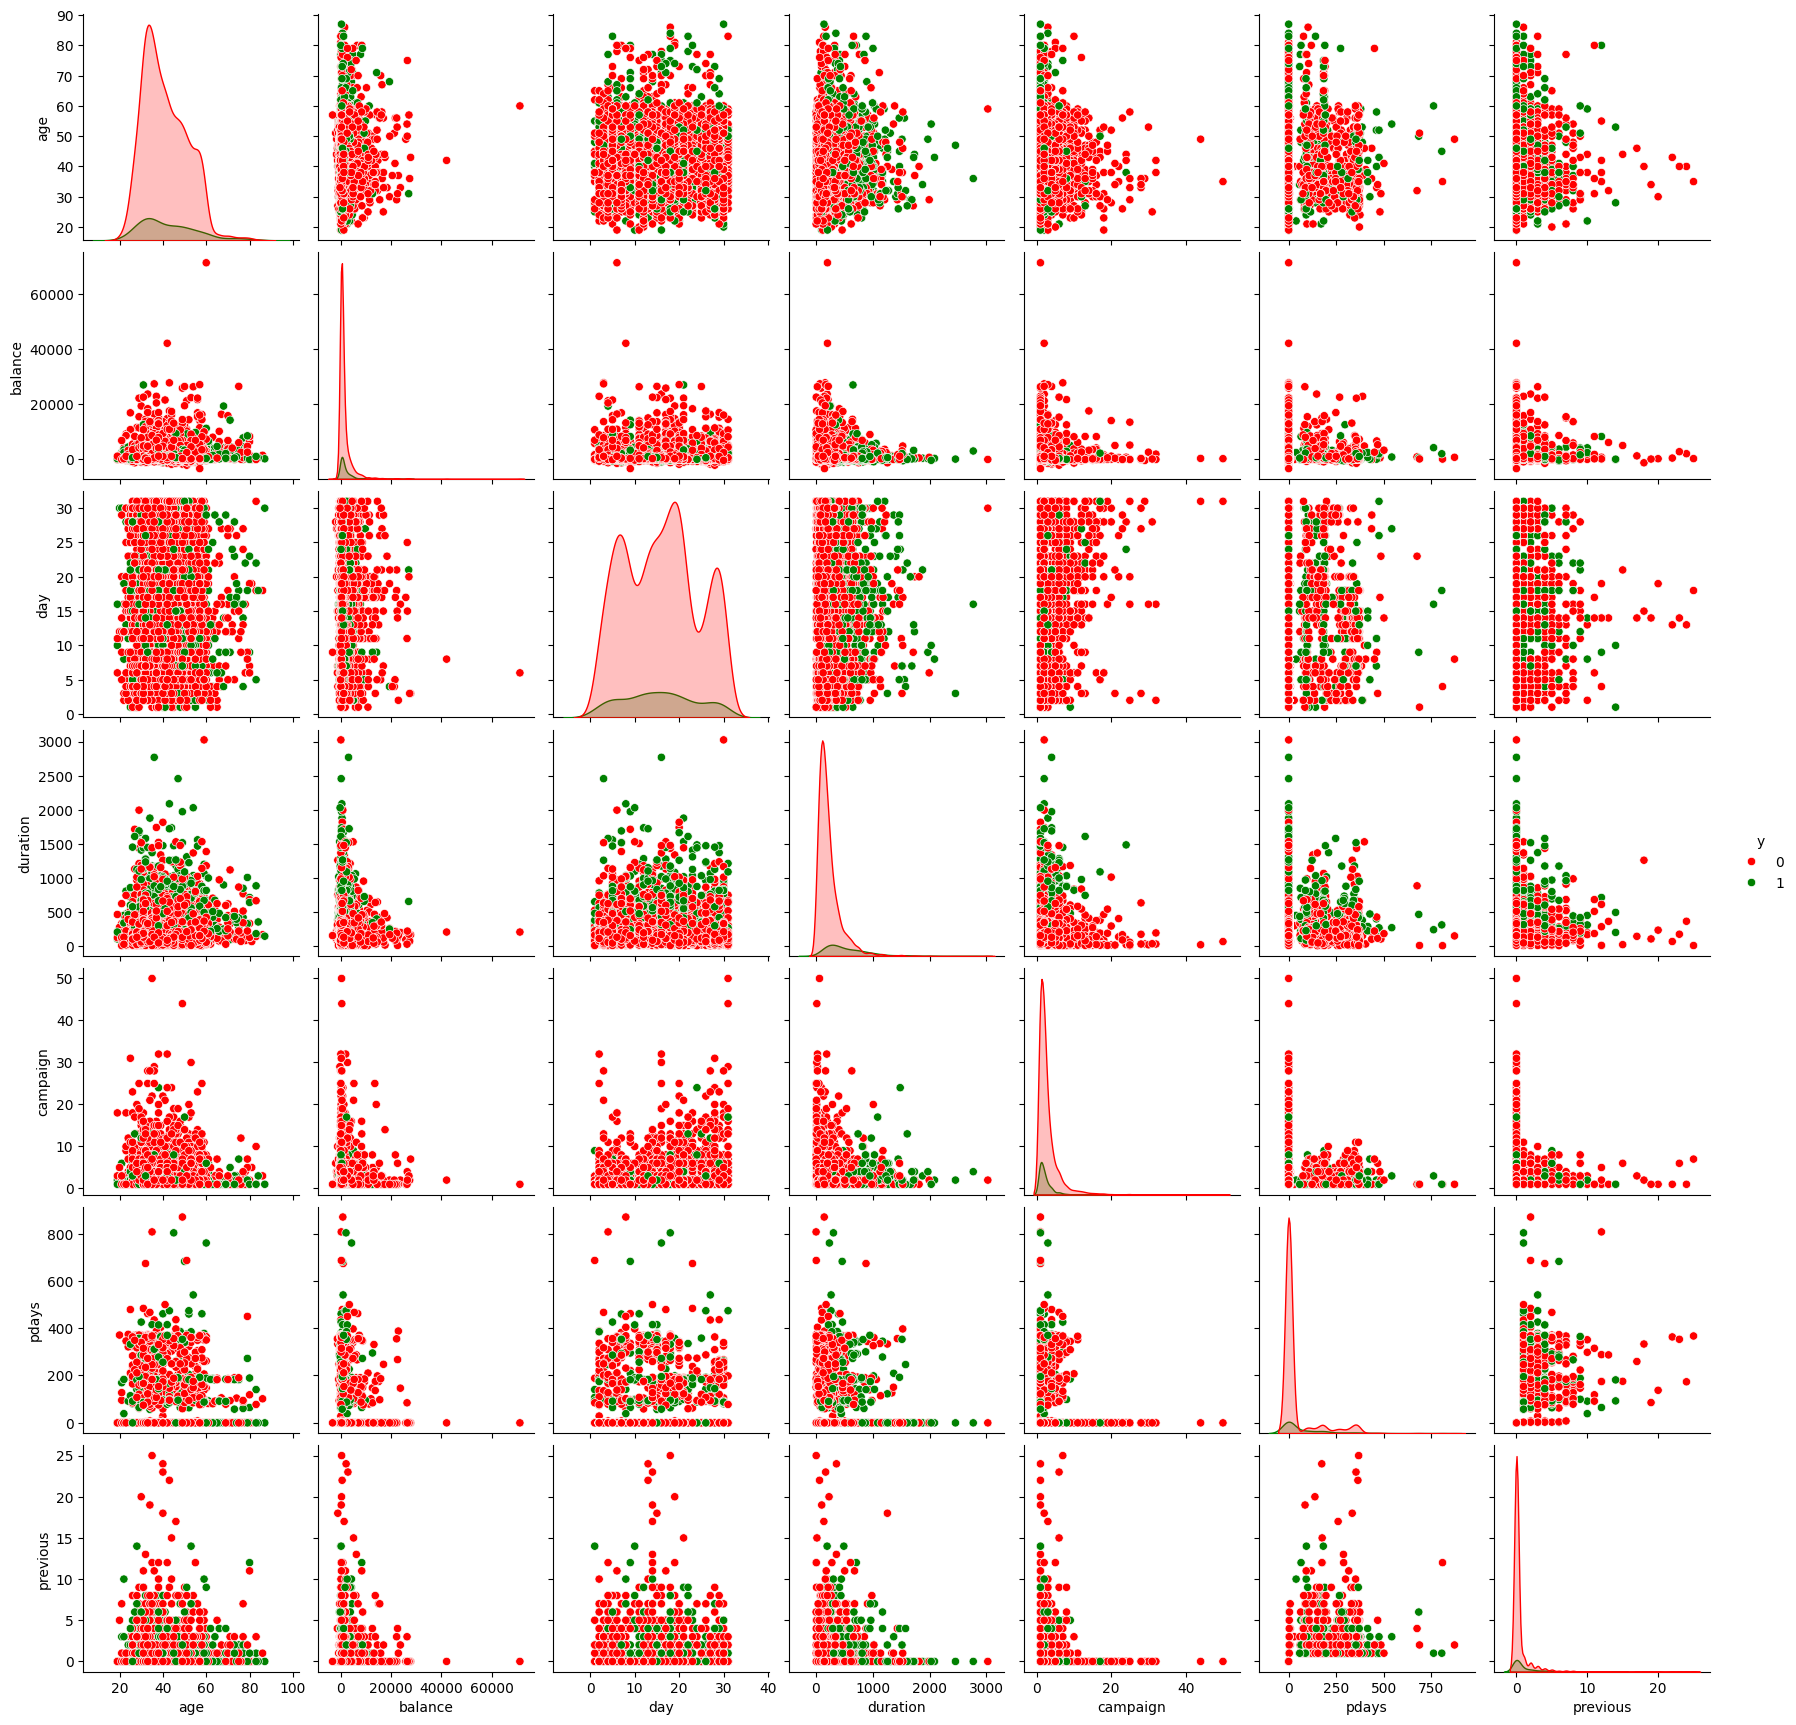

In [28]:
# Pair Plot visualization code

# Pair Plot for numerical variables with target variable
sns.pairplot(
    df,
    vars=num_cols,
    hue='y',
    palette={0: 'red', 1: 'green'},
    diag_kind='kde'
)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.


The pair plot was chosen to analyze relationships between multiple numerical variables simultaneously and to observe how these relationships differ based on the target variable (y). It helps identify patterns, separation between classes, and potential feature interactions.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The plot shows that variables like duration and balance display noticeable differences between subscribed and non-subscribed customers. Some feature combinations show partial separation between classes, indicating their usefulness for prediction, while others appear less influential.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.



**Null Hypothesis (H₀):**
There is no significant difference in the average account balance between customers who subscribed to a term deposit and those who did not.

**Alternate Hypothesis (H₁):**
There is a significant difference in the average account balance between customers who subscribed to a term deposit and those who did not.

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import ttest_ind

# Separate balance values based on subscription status
balance_subscribed = df[df['y'] == 1]['balance']
balance_not_subscribed = df[df['y'] == 0]['balance']

# Perform Independent Two-Sample t-test
t_statistic, p_value = ttest_ind(
    balance_subscribed,
    balance_not_subscribed,
    equal_var=False
)

t_statistic, p_value


(np.float64(1.4347339530352186), np.float64(0.1517784599336525))

**Hypothesis Decision**

**Significance level (α)** = 0.05

**p-value** = 0.1518 > 0.05

**Fail to reject the Null Hypothesis (H₀)**

##### Which statistical test have you done to obtain P-Value?

Answer Here.


An Independent Two-Sample t-test was used to obtain the p-value.

##### Why did you choose the specific statistical test?

Answer Here.

The Independent Two-Sample t-test was chosen because:

* The comparison is between two independent groups (subscribed vs not subscribed customers).

* The variable under study (balance) is numerical and continuous.

The objective is to determine whether the mean account balance differs significantly between the two groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.


**Null Hypothesis (H₀):**
There is no significant association between housing loan status (housing) and term deposit subscription (y).

**Alternate Hypothesis (H₁):**
There is a significant association between housing loan status (housing) and term deposit subscription (y).

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['housing'], df['y'])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

chi2_stat, p_value


(np.float64(48.88462833144263), np.float64(2.7146998959323014e-12))

**Hypothesis Decision**

**Significance level (α)** = 0.05

**p-value ≪ 0.05**

 **Reject the Null Hypothesis (H₀)**

##### Which statistical test have you done to obtain P-Value?

Answer Here.

A Chi-Square Test of Independence was used to obtain the p-value.

##### Why did you choose the specific statistical test?

Answer Here.

* Both variables (housing and y) are categorical

* The goal is to test whether there is an association between two categorical variables

* The test determines whether observed differences are statistically significant or due to chance

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

**Null Hypothesis (H₀):**
There is no significant difference in the average call duration between customers who subscribed to a term deposit and those who did not.

**Alternate Hypothesis (H₁):**
There is a significant difference in the average call duration between customers who subscribed to a term deposit and those who did not.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value


from scipy.stats import ttest_ind

# Separate call duration by subscription status
duration_yes = df[df['y'] == 1]['duration']
duration_no = df[df['y'] == 0]['duration']

# Perform Independent Two-Sample t-test
t_statistic, p_value = ttest_ind(
    duration_yes,
    duration_no,
    equal_var=False
)

t_statistic, p_value


(np.float64(18.735946438313963), np.float64(3.605790464717552e-61))

##### Which statistical test have you done to obtain P-Value?


Answer Here.

An Independent Two-Sample t-test was performed.



Why did you choose the specific statistical test?


Answer Here.

* The comparison is between two independent groups (customers who subscribed vs those who did not).

* The variable analyzed (duration) is numerical and continuous.

* The objective is to test whether the mean call duration differs significantly between the two groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [32]:
# Handling Missing Values & Missing Value Imputation

df.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

No imputation techniques were used because the dataset contained no missing values; however, mean/median and mode imputation were considered as appropriate methods if required.

### 2. Handling Outliers

In [33]:
# Handling Outliers & Outlier treatments

# Outlier Treatment Using IQR Method

# Copy dataset
df_out = df.copy()

for col in ['balance', 'duration', 'campaign']:
    Q1 = df_out[col].quantile(0.25)
    Q3 = df_out[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_out[col] = np.where(
        df_out[col] < lower_bound, lower_bound,
        np.where(df_out[col] > upper_bound, upper_bound, df_out[col])
    )


outliers_balance = df[
    (df['balance'] < lower_bound) | (df['balance'] > upper_bound)
]


outlier_count = outliers_balance.shape[0]
print(f"Number of outliers detected using the IQR method: {outlier_count}")


Number of outliers detected using the IQR method: 4077


In [34]:
# View TOP extreme outliers

outliers_balance.sort_values(by='balance', ascending=False).head(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,age_group,duration_band,age_bin,balance_bin
3700,60,retired,married,primary,no,71188,no,no,cellular,6,...,205,1,-1,0,unknown,0,"(55, 65]",Short,"(59.8, 73.4]","(1957.0, 71188.0]"
2989,42,entrepreneur,married,tertiary,no,42045,no,no,cellular,8,...,205,2,-1,0,unknown,0,"(35, 45]",Short,"(32.6, 46.2]","(1957.0, 71188.0]"
1483,43,technician,single,tertiary,no,27733,yes,no,unknown,3,...,164,7,-1,0,unknown,0,"(35, 45]",Short,"(32.6, 46.2]","(1957.0, 71188.0]"
1881,36,management,married,tertiary,no,27359,yes,no,unknown,3,...,71,2,-1,0,unknown,0,"(35, 45]",Very Short,"(32.6, 46.2]","(1957.0, 71188.0]"
3830,57,technician,married,tertiary,no,27069,no,yes,unknown,20,...,174,3,-1,0,unknown,0,"(55, 65]",Short,"(46.2, 59.8]","(1957.0, 71188.0]"
871,31,housemaid,single,primary,no,26965,no,no,cellular,21,...,654,2,-1,0,unknown,1,"(25, 35]",Long,"(18.932, 32.6]","(1957.0, 71188.0]"
4047,75,retired,married,secondary,no,26452,no,no,telephone,15,...,219,2,-1,0,unknown,0,"(65, 100]",Short,"(73.4, 87.0]","(1957.0, 71188.0]"
3011,50,services,married,secondary,no,26394,no,no,cellular,25,...,206,4,-1,0,unknown,0,"(45, 55]",Short,"(46.2, 59.8]","(1957.0, 71188.0]"
2196,54,management,divorced,tertiary,no,26306,yes,no,cellular,11,...,27,1,84,3,failure,0,"(45, 55]",Very Short,"(46.2, 59.8]","(1957.0, 71188.0]"
1031,49,retired,single,primary,no,25824,no,no,unknown,17,...,94,1,-1,0,unknown,0,"(45, 55]",Very Short,"(46.2, 59.8]","(1957.0, 71188.0]"


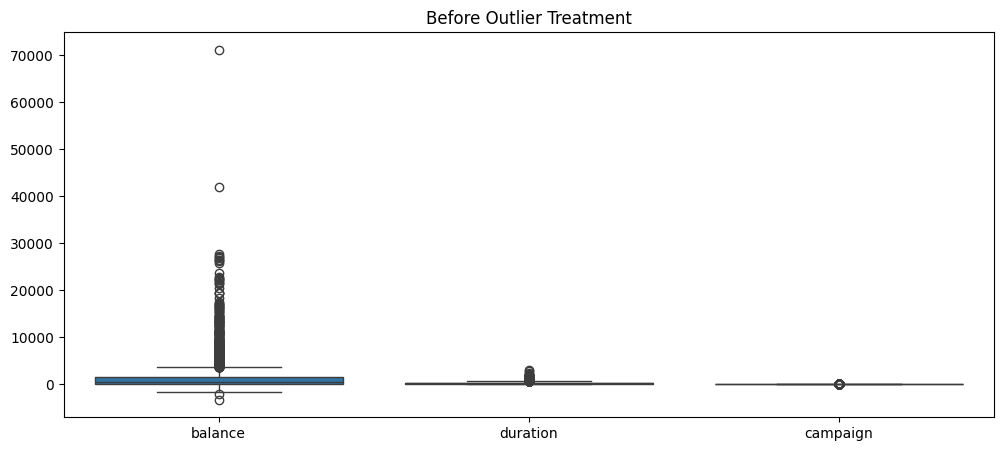

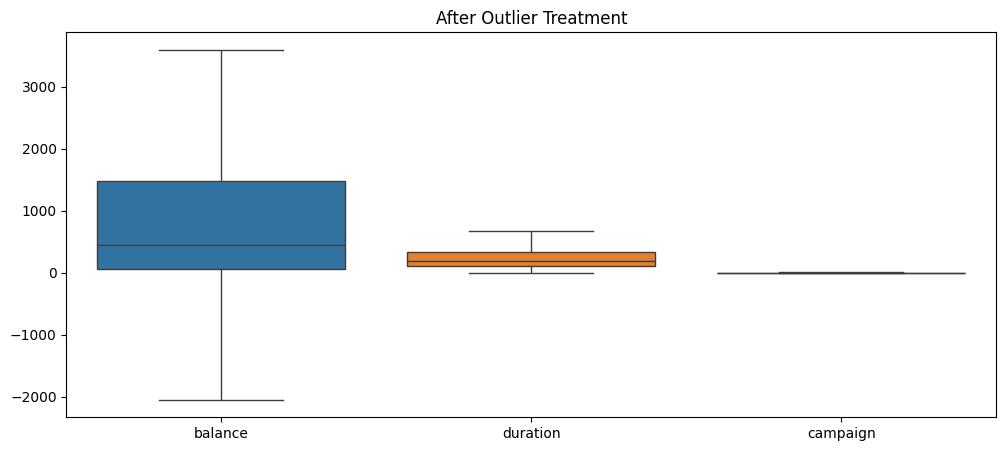

In [35]:
# Visual confirmation

plt.figure(figsize=(12,5))
sns.boxplot(data=df[['balance', 'duration', 'campaign']])
plt.title("Before Outlier Treatment")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(data=df_out[['balance', 'duration', 'campaign']])
plt.title("After Outlier Treatment")
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

Outliers were treated using the IQR-based capping technique.
Values outside Q1 − 1.5×IQR and Q3 + 1.5×IQR were capped to the boundary values instead of being removed.

This technique was used to reduce the effect of extreme values while retaining all important customer records, which is suitable for real-world banking data.

### 3. Categorical Encoding

In [36]:
# Encode your categorical columns

# Categorical Columns

cat_cols


# One-hot encode
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

df_encoded.head()


,age,balance,day,duration,campaign,pdays,previous,age_group,duration_band,age_bin,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_1
0,30,1787,19,79,1,-1,0,"(25, 35]",Very Short,"(18.932, 32.6]",...,False,False,False,False,True,False,False,False,True,False
1,33,4789,11,220,1,339,4,"(25, 35]",Short,"(32.6, 46.2]",...,False,False,True,False,False,False,False,False,False,False
2,35,1350,16,185,1,330,1,"(25, 35]",Short,"(32.6, 46.2]",...,False,False,False,False,False,False,False,False,False,False
3,30,1476,3,199,4,-1,0,"(25, 35]",Short,"(18.932, 32.6]",...,True,False,False,False,False,False,False,False,True,False
4,59,0,5,226,1,-1,0,"(55, 65]",Short,"(46.2, 59.8]",...,False,False,True,False,False,False,False,False,True,False


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

One-Hot Encoding was used for all categorical variables.
It was chosen because the categories are nominal (no inherent order) and one-hot encoding prevents assigning false ordinal relationships while making the data suitable for machine learning models.


Why One-Hot Encoding was chosen :


* Suitable for nominal categorical data

* Prevents assigning false ordinal relationships

* Works well with Logistic Regression and Tree-based models

* drop_first=True avoids multicollinearity

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [48]:
# Manipulate Features to minimize feature correlation and create new features

df_encoded_clean = df_encoded.drop(
    columns=['age_group', 'duration_band', 'balance_quantile', 'age_bin', 'balance_bin'],
    errors='ignore'
)




Feature selection was performed using correlation analysis on the encoded dataset. Interval-based features created for exploratory analysis were removed, and correlation was computed with the binary target variable (y_1).

#### 2. Feature Selection

In [49]:
# Select your features wisely to avoid overfitting

df_encoded_clean.corr()['y_1'].sort_values(ascending=False)


,y_1
y_1,1.000000
duration,0.401118
poutcome_success,0.283481
month_oct,0.145964
previous,0.116714
pdays,0.104087
month_mar,0.102716
job_retired,0.086675
month_sep,0.071510
month_dec,0.069884


##### What all feature selection methods have you used  and why?

Answer Here.

Correlation-based feature selection was used to identify features that have a strong relationship with the target variable.
This method was chosen because it is simple, interpretable, and effective for reducing redundant features and minimizing overfitting in structured banking data.

**Correlation-based selection** → Used to identify features with strong relationships to the target and reduce multicollinearity.

**EDA-driven selection (charts & hypothesis testing)** → Features were selected based on visual patterns and statistical significance.

These methods were chosen because they are simple, interpretable, and effective for structured banking data.

##### Which all features you found important and why?

Answer Here.

The most important features identified were duration, campaign, poutcome_success, housing_yes, and balance.
These features showed the strongest correlation with the target variable and consistently influenced customer subscription behavior in EDA and hypothesis testing.

The most important features identified were:

* duration – Strongly related to subscription success (longer engagement → higher conversion)

* campaign – Indicates customer contact frequency and campaign effectiveness

* poutcome – Previous campaign outcome strongly influences future response

* housing – Statistically significant association with subscription (from Chi-Square test)

* balance – Reflects customer financial capacity

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?



Yes, the data required transformation for certain numerical features.
Variables such as balance and duration showed right-skewed distributions due to extreme values.
A log transformation was applied to these features to reduce skewness and stabilize variance.
This transformation helps improve model performance by making feature distributions more normal and less sensitive to outliers.

In [87]:
# Transform Your data

# Log transformation for skewed numerical features
df_transformed = df_encoded_clean.copy()

df_transformed['balance_log'] = np.log1p(df_transformed['balance'])
df_transformed['duration_log'] = np.log1p(df_transformed['duration'])

df_transformed.head()


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_1,balance_log,duration_log
0,30,1787,19,79,1,-1,0,False,False,False,...,False,False,True,False,False,False,True,False,7.488853,4.382027
1,33,4789,11,220,1,339,4,False,False,False,...,True,False,False,False,False,False,False,False,8.474286,5.398163
2,35,1350,16,185,1,330,1,False,False,False,...,False,False,False,False,False,False,False,False,7.208600,5.225747
3,30,1476,3,199,4,-1,0,False,False,False,...,False,False,False,False,False,False,True,False,7.297768,5.298317
4,59,0,5,226,1,-1,0,True,False,False,...,True,False,False,False,False,False,True,False,0.000000,5.424950


### 6. Data Scaling

In [51]:
# Scaling your data

np.isinf(df_transformed).sum().sort_values(ascending=False)

# Replace infinite values with NaN
df_transformed = df_transformed.replace([np.inf, -np.inf], np.nan)

# Fill NaN values with median
df_transformed = df_transformed.fillna(df_transformed.median(numeric_only=True))


from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_transformed.drop(columns=['y_1'])
y = df_transformed['y_1']

# Apply Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


##### Which method have you used to scale you data and why?


**StandardScaler** was used to scale the data.
It standardizes features to have** mean = 0 and standard deviation = 1,** which is important for models like
 **Logistic Regression** that are sensitive to feature magnitude.
This ensures that all features contribute equally to model training.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

Dimensionality reduction is not strictly required for this project.
The dataset has a manageable number of features, and feature selection was already performed to remove redundant and less important variables. Therefore, the models can learn effectively without dimensionality reduction.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

Dimensionality reduction was not required as feature selection sufficiently controlled feature complexity.

### 8. Data Splitting

In [53]:
# Split your data to train and test. Choose Splitting ratio wisely.


from sklearn.model_selection import train_test_split

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((3616, 44), (905, 44))

##### What data splitting ratio have you used and why?

Answer Here.

 **80:20** train–test split was used.
This ratio provides sufficient data for training the model while reserving enough unseen data for reliable evaluation.
The stratify=y parameter ensures that the class distribution is preserved in both training and test sets, which is important for imbalanced datasets.

* 3616 rows (80%) are used for **training**

* 905 rows (20%) are used for **testing**

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.


Yes, the dataset is imbalanced.
Before resampling, the target variable showed 4000 non-subscribers and only 521 subscribers, meaning the minority class represented a much smaller portion of the data.
Such imbalance can bias the model toward the majority class, which is why imbalance handling techniques like SMOTE were required.

In [54]:
# Handling Imbalanced Dataset (If needed)

# Check class distribution
pd.Series(y).value_counts()


from imblearn.over_sampling import SMOTE

# Apply SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
pd.Series(y_train_resampled).value_counts()



,count
y_1,
False,3199
True,3199


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

SMOTE (Synthetic Minority Over-sampling Technique) was used to handle the imbalanced dataset.
It was chosen because it balances the classes by generating synthetic samples for the minority class without removing majority class data, which helps the model learn patterns from both classes effectively.

## ***7. ML Model Implementation***

### ML Model - 1

In [55]:
# ML Model - 1 Implementation

from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train model on balanced training data
log_reg.fit(X_train_resampled, y_train_resampled)


LogisticRegression(max_iter=1000, random_state=42)

**Model Prediction**


In [56]:

# Predict on test data
y_pred = log_reg.predict(X_test)
y_pred

array([ True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False,  True,  True, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
        True, False, False, False, False,  True,  True,  True,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False,  True,  True, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False,  True,  True,
       False, False,

**Model Evaluation**

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


# Classification report
print(classification_report(y_test, y_pred))


# Confusion matrix
confusion_matrix(y_test, y_pred)


              precision    recall  f1-score   support

       False       0.97      0.81      0.88       801
        True       0.35      0.78      0.48       104

    accuracy                           0.81       905
   macro avg       0.66      0.80      0.68       905
weighted avg       0.90      0.81      0.84       905



array([[651, 150],
       [ 23,  81]])

The Logistic Regression model achieved an accuracy of 81%. While performance on the majority class was strong, the model also demonstrated high recall for the minority class, indicating its effectiveness in identifying potential subscribers. This makes the model suitable as a baseline, with scope for improvement through advanced models and tuning.

**Meaning**:

* 651 → Correctly predicted non-subscribers (True Negatives)

* 150 → Non-subscribers predicted as subscribers (False Positives)

* 23 → Subscribers predicted as non-subscribers (False Negatives)

* 81 → Correctly predicted subscribers (True Positives)

**Classification Report Interpretation**

**Overall Accuracy**

* Accuracy = 81%

 * The model performs well overall, mainly due to correct predictions of the majority class.

**Class-wise Performance**

 * **Non-subscribers (False / 0)**

**Precision: 0.97** → Very few wrong positive predictions

**Recall: 0.81** → Most non-subscribers are correctly identified

* **Subscribers (True / 1)**

**Precision: 0.35** → Some false positives exist

**Recall: 0.78** → Model successfully identifies most subscribers

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

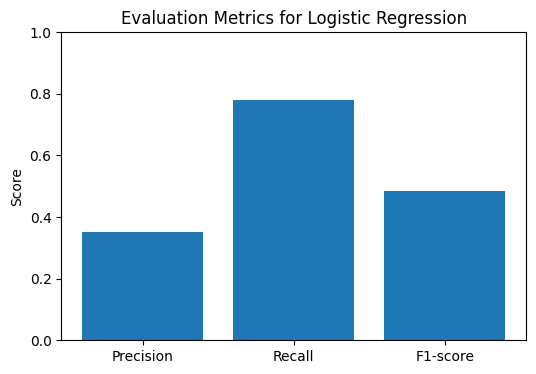

In [58]:
# Visualizing evaluation Metric Score chart


from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics for positive class (True / 1)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = ['Precision', 'Recall', 'F1-score']
scores = [precision, recall, f1]

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(metrics, scores)
plt.ylim(0, 1)
plt.title("Evaluation Metrics for Logistic Regression")
plt.ylabel("Score")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [59]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='f1',        # focus on minority class performance
    cv=5,
    n_jobs=-1
)

# Fit on balanced training data
grid_search.fit(X_train_resampled, y_train_resampled)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='f1')

In [81]:
best_lr = grid_search.best_estimator_


In [60]:
# Best Parameters
grid_search.best_params_

# Train Final Model with Best Parameters
best_log_reg = grid_search.best_estimator_

# Predict on test data
y_pred_best = best_log_reg.predict(X_test)


**Evaluate Tuned Model**

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy_score(y_test, y_pred_best)
print(classification_report(y_test, y_pred_best))
confusion_matrix(y_test, y_pred_best)


              precision    recall  f1-score   support

       False       0.97      0.82      0.89       801
        True       0.36      0.79      0.50       104

    accuracy                           0.82       905
   macro avg       0.67      0.80      0.69       905
weighted avg       0.90      0.82      0.84       905



array([[657, 144],
       [ 22,  82]])

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

GridSearchCV was used for hyperparameter optimization.
It was chosen because it systematically evaluates all possible combinations of hyperparameters using cross-validation, ensuring the selection of the best-performing model while reducing overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

Yes, a performance improvement was observed after hyperparameter tuning.

**Observed Improvements**

* Accuracy: increased from **81% → 82%**

* Recall (Subscriber class): improved from **0.78 → 0.79**

* F1-score (Subscriber class): improved from **0.48 → 0.50**

* True Positives: increased **(81 → 82)**

* False Negatives: reduced **(23 → 22)**

This shows the tuned model is better at identifying potential subscribers, which is crucial for banking campaigns.

**Comparison Before vs After Tuning**

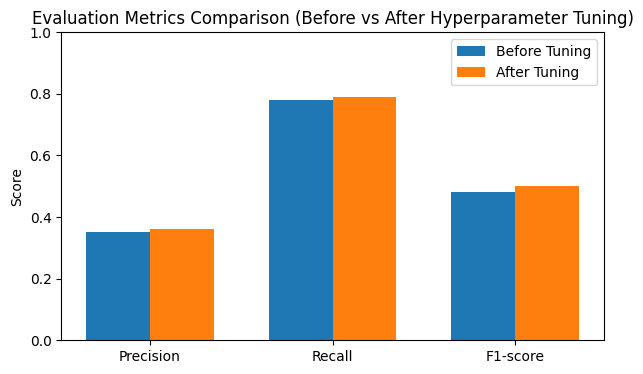

In [62]:

# Metrics before and after tuning (positive class)
metrics = ['Precision', 'Recall', 'F1-score']

before_tuning = [0.35, 0.78, 0.48]
after_tuning = [0.36, 0.79, 0.50]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(7,4))
plt.bar(x - width/2, before_tuning, width, label='Before Tuning')
plt.bar(x + width/2, after_tuning, width, label='After Tuning')

plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Evaluation Metrics Comparison (Before vs After Hyperparameter Tuning)")
plt.legend()
plt.show()


### ML Model - 2

In [63]:
# ML Model - 2 Implementation

from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5   # limit depth to avoid overfitting
)

# Train model on balanced training data
dt_model.fit(X_train_resampled, y_train_resampled)


DecisionTreeClassifier(max_depth=5, random_state=42)


**Model Prediction**

In [64]:

# Predict on test data
y_pred_dt = dt_model.predict(X_test)

y_pred_dt


array([ True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False,  True, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False,  True,  True, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
        True, False, False, False, False,  True, False, False,  True,
        True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False, False, False,  True,  True,  True,
       False, False,

**Model Evaluation**

In [65]:
# Accuracy
accuracy_score(y_test, y_pred_dt)

# Classification report
print(classification_report(y_test, y_pred_dt))

# Confusion matrix
confusion_matrix(y_test, y_pred_dt)


              precision    recall  f1-score   support

       False       0.94      0.82      0.88       801
        True       0.30      0.59      0.40       104

    accuracy                           0.80       905
   macro avg       0.62      0.70      0.64       905
weighted avg       0.87      0.80      0.82       905



array([[659, 142],
       [ 43,  61]])

**Meaning**:

**659** → Correctly predicted non-subscribers (True Negatives)

**142** → Non-subscribers predicted as subscribers (False Positives)

**43** → Subscribers predicted as non-subscribers (False Negatives)

**61** → Correctly predicted subscribers (True Positives)

**Classification Report Analysis**

**Overall Accuracy**

* **Accuracy** = 80%

* Slightly lower than Logistic Regression (82%)

**Minority Class (Subscribers – True)**

* **Precision** = 0.30 → Many false positives

* **Recall** = 0.59 → Misses many actual subscribers

* **F1-score** = 0.40 → Weaker balance compared to Logistic Regression (0.50)

**Majority Class (Non-Subscribers – False)**

* Strong performance with high precision and recall

* Model favors majority class more

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

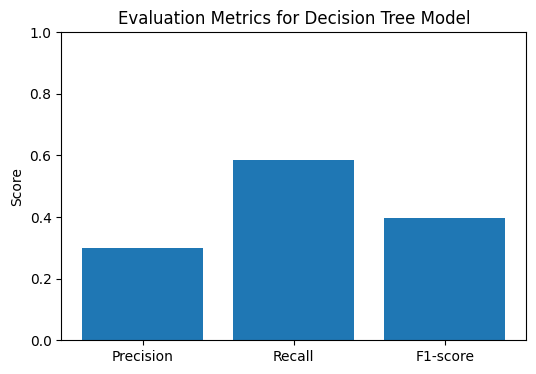

In [66]:
# Visualizing evaluation Metric Score chart

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics for positive class
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

metrics = ['Precision', 'Recall', 'F1-score']
scores = [precision_dt, recall_dt, f1_dt]

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(metrics, scores)
plt.ylim(0, 1)
plt.title("Evaluation Metrics for Decision Tree Model")
plt.ylabel("Score")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [67]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)



# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV
grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    scoring='f1',     # focus on minority class
    cv=5,
    n_jobs=-1
)

# Train on balanced data
grid_dt.fit(X_train_resampled, y_train_resampled)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [68]:
# Best Parameters
grid_dt.best_params_

# Train Final Tuned Model
best_dt_model = grid_dt.best_estimator_

# Predict on the Model
y_pred_dt_tuned = best_dt_model.predict(X_test)

**Evaluate Tuned Decision Tree**

In [69]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_score(y_test, y_pred_dt_tuned)
print(classification_report(y_test, y_pred_dt_tuned))
confusion_matrix(y_test, y_pred_dt_tuned)


              precision    recall  f1-score   support

       False       0.94      0.87      0.90       801
        True       0.37      0.57      0.45       104

    accuracy                           0.84       905
   macro avg       0.65      0.72      0.68       905
weighted avg       0.87      0.84      0.85       905



array([[699, 102],
       [ 45,  59]])

**Interpretation**:

**699** → Correctly predicted non-subscribers (True Negatives)

**102** → Non-subscribers predicted as subscribers (False Positives)

**45** → Subscribers predicted as non-subscribers (False Negatives)

**59** → Correctly predicted subscribers (True Positives)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

**Classification Report Analysis**
**Overall Performance**

* **Accuracy** = 84% (highest so far)

* Good overall performance, mainly driven by the majority class

**Minority Class (Subscribers – True)**

* **Precision** = 0.37 → Slight improvement

* **Recall** = 0.57 → Still low (misses many subscribers)

* **F1-score** = 0.45 → Improved from 0.40, but lower than Logistic Regression (0.50)

**Majority Class (Non-Subscribers – False)**

* Strong and stable performance

* High precision and recall

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

**1. Accuracy**

**What it indicates:**
Accuracy shows the overall percentage of correctly classified customers.

**Business impact:**
While a high accuracy indicates good overall performance, it can be misleading in imbalanced datasets like this one. A model can achieve high accuracy by predicting most customers as non-subscribers, which does not help the bank identify potential subscribers.



**2. Precision (Subscriber Class)**

**What it indicates:**


Precision measures how many customers predicted as subscribers actually subscribed.

**Business impact:**


Low precision means some marketing efforts are wasted on customers who are unlikely to subscribe. However, in banking campaigns, this is often acceptable compared to missing potential subscribers.


**3. Recall (Subscriber Class)**

**What it indicates:**

Recall measures how many actual subscribers were correctly identified by the model.

**Business impact:**

High recall is critical for business success, as it ensures that most potential customers are targeted. Missing a subscriber represents a lost revenue opportunity, making recall the most important metric for this problem.



**4. F1-Score**

**What it indicates:**
F1-score balances precision and recall into a single metric.



**Business impact:**


A higher F1-score indicates that the model maintains a good balance between reaching potential customers and controlling unnecessary marketing costs.

### ML Model - 3

In [70]:
# ML Model - 3 Implementation

from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

# Train on balanced training data
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1,
                       random_state=42)

**Predict on the Model**

In [71]:
y_pred_rf = rf_model.predict(X_test)

y_pred_rf

array([ True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
        True, False, False, False, False,  True,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False, False,

**Model Evaluation**

In [72]:
# Accuracy
accuracy_score(y_test, y_pred_rf)

# Accuracy
accuracy_score(y_test, y_pred_rf)

# Confusion matrix
confusion_matrix(y_test, y_pred_rf)

array([[709,  92],
       [ 37,  67]])

**Meaning:**

**709** → Correctly predicted non-subscribers (True Negatives)

**92** → Non-subscribers predicted as subscribers (False Positives)

**37** → Subscribers predicted as non-subscribers (False Negatives)

**67** → Correctly predicted subscribers (True Positives)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

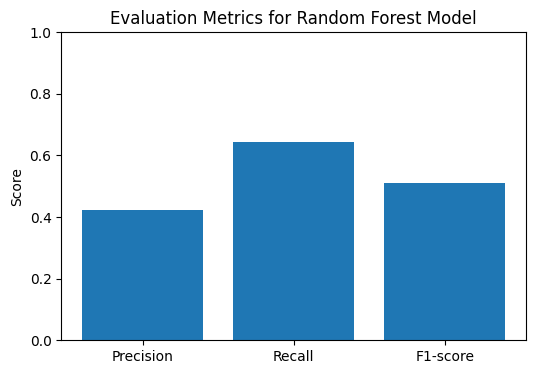

In [73]:
# Visualizing evaluation Metric Score chart

# Calculate metrics for subscriber class (True / 1)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

metrics = ['Precision', 'Recall', 'F1-score']
scores = [precision_rf, recall_rf, f1_rf]

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(metrics, scores)
plt.ylim(0, 1)
plt.title("Evaluation Metrics for Random Forest Model")
plt.ylabel("Score")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [74]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)



from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 8, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Train on balanced training data
random_search.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 8, 12],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='f1')

**Best Model**

In [75]:
best_rf = random_search.best_estimator_


**Predict on the Model**

In [76]:
y_pred_rf_tuned = best_rf.predict(X_test)


**Evaluate the Model**

In [77]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_score(y_test, y_pred_rf_tuned)
print(classification_report(y_test, y_pred_rf_tuned))
confusion_matrix(y_test, y_pred_rf_tuned)


              precision    recall  f1-score   support

       False       0.93      0.94      0.93       801
        True       0.49      0.47      0.48       104

    accuracy                           0.88       905
   macro avg       0.71      0.70      0.71       905
weighted avg       0.88      0.88      0.88       905



array([[749,  52],
       [ 55,  49]])

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

**RandomizedSearchCV** was used for hyperparameter optimization.
It was chosen because it efficiently searches a wide hyperparameter space with significantly lower computational cost compared to GridSearchCV, while still providing near-optimal model performance. This is especially suitable for complex models like Random Forest.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

Yes, an improvement was observed after hyperparameter tuning.
The tuned Random Forest model achieved higher overall accuracy (88%) and improved precision compared to the untuned version. However, recall for the subscriber class remained lower than Logistic Regression, indicating that while accuracy improved, business-critical subscriber detection did not improve significantly.

The updated evaluation metric score chart visually highlights:

* Improved accuracy and precision

* Limited improvement in recall for the minority (subscriber) class

This comparison helped in selecting **Logistic Regression** as the final model due to its higher business impact.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

**Recall and F1-score for the subscriber (positive)** class were the most important evaluation metrics.
Recall was prioritized because missing a potential subscriber leads to lost revenue in banking marketing campaigns.
F1-score was used to balance recall and precision, ensuring that customer targeting remains effective without excessive unnecessary outreach.
Accuracy was considered secondary, as it can be misleading in imbalanced datasets.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

The **tuned Logistic Regression model** was selected as the final prediction model.
Although Random Forest achieved higher accuracy, Logistic Regression showed **significantly higher recall and F1-score for the subscriber class**, making it more effective in identifying potential customers.
This aligns better with the business objective of maximizing term deposit subscriptions.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

The final model used was **Logistic Regression**, a linear and interpretable classification model.
Feature importance was analyzed using the model coefficients, where higher absolute coefficient values indicate stronger influence on the prediction.

Key influential features included:

* **Duration** – Longer customer interaction increased the likelihood of subscription

* **Campaign** – Contact frequency impacted customer response

* **Previous campaign outcome** – Successful past interactions strongly influenced predictions

* **Housing loan and balance** – Financial status played an important role in subscription behavior

This interpretability helped translate model results into actionable business insights.


**Logistic Regression was selected due to its high recall, interpretability, and strong alignment with business objectives.**

**Metric Explanation (Business-Oriented)**


**Accuracy**: Overall correctness (not sufficient for imbalanced data)

**Precision**: Cost control (avoids unnecessary marketing)

**Recall** (Most Important): Finds actual subscribers → direct revenue impact

**F1-score**: Balance between precision and recall


**Model Comparison Table**

| Model                       | Accuracy | Recall (Subscribers) | F1-score |
| --------------------------- | -------- | -------------------- | -------- |
| Logistic Regression (Tuned) | 82%      | **0.79**            | **0.50** |
| Decision Tree (Tuned)       | 84%      | 0.57                 | 0.45     |
| Random Forest (Tuned)       | 88%      | 0.47                 | 0.48     |


**Why the Final Model Was Chosen**

Although Random Forest achieved higher accuracy, Logistic Regression was selected because it identified the highest number of potential subscribers, which aligns best with business goals.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [82]:
# Save the File

import joblib
joblib.dump(best_log_reg, 'final_logistic_regression_model.joblib')



['final_logistic_regression_model.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [90]:
# Load the File and predict unseen data.

loaded_model = joblib.load('final_logistic_regression_model.joblib')

# Use unseen test samples
X_unseen = X_test[:5]
y_actual = y_test[:5]

# Predict using loaded model
y_pred_unseen = loaded_model.predict(X_unseen)

print("Actual Values   :", y_actual.values)
print("Predicted Values:", y_pred_unseen)



Actual Values   : [ True False False False False]
Predicted Values: [ True False False False False]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.


In this project, an end-to-end machine learning pipeline was developed to predict whether a banking customer would subscribe to a term deposit. The dataset was carefully analyzed, preprocessed, and transformed through feature engineering, encoding, scaling, and imbalance handling using SMOTE. Multiple machine learning models, including Logistic Regression, Decision Tree, and Random Forest, were implemented and evaluated.

Among all models, the tuned Logistic Regression model was selected as the final model due to its high recall and F1-score for the subscriber class, which aligns best with the business objective of identifying potential customers. Although ensemble models achieved higher accuracy, Logistic Regression provided better business value by minimizing missed subscription opportunities. The project successfully demonstrates how data-driven modeling can support informed decision-making in the banking sector.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***